## Indian Cuisine Analysis

### “Indian cuisine uses the whole palette of flavors—spicy, sour, sweet, and hot all at the same time—making it something that wants to jump off the plate,”

The cuisine of India is one of the world's most diverse cuisines, characterized by its sophisticated and subtle use of the many spices, vegetables, grains and fruits grown across India.The cuisine of India has is considered one of the world’s most diverse cuisines. This analysis comprises of some interesting facts and observations that people might not know about Indian cuisine.

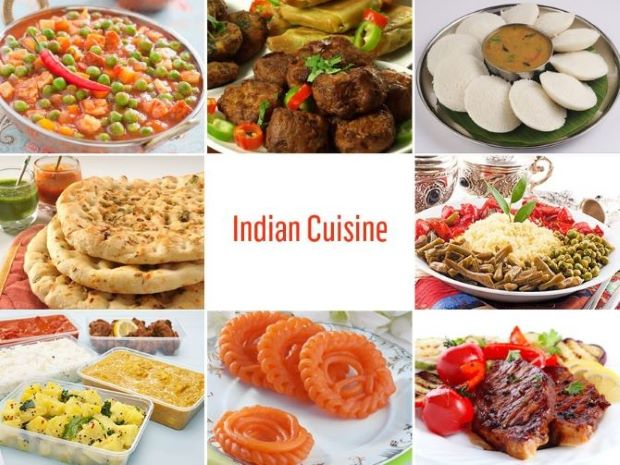

In [155]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import random
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image

In [141]:
import plotly.io as pio
pio.renderers.default='notebook'

In [142]:
df = pd.read_csv('indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time  flavor_profile   course        state  \
0  vegetarian       45.0        25.0          sweet  dessert  West Bengal   
1  vegetarian       80.0        30.0          sweet  dessert    Rajasthan   
2  vegetarian       15.0        60.0          sweet  dessert       Punjab   
3  vegetarian       15.0        30.0          sweet  dessert    Rajasthan   
4  vegetarian       15.0        40.0          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [143]:
df.shape


(255, 9)

This dataset contains 255 indian dishes and 9 columns associated with each of them.

### I. Proportion of vegetarian and non vegetarian dishes

In [144]:
df_pie = df.diet.value_counts().reset_index()
df_pie.columns=['diet','count']
fig=px.pie(df_pie,values='count',names='diet',title='Proportion of Vegetarian and Non-Vegetarian dishes',
           color_discrete_sequence=['green','red'])
fig.show()


<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
    Here we observed that no. of vegetarian dishes are <b>more</b> than the no. of non-vegetarian dishes.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
    India is ranked top in the world with <u>38%</u> of the total population being vegetarians.
    

### II. Number of dishes based on regions 

In [145]:
df_region = df.region.value_counts().reset_index()
df_region.columns=['region','count']
df_region=df_region.sample(frac=1)
fig=px.bar(df_region,x='region',y='count',title='Number of dishes based on religion',color_discrete_sequence=['#1A237E'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
    Here we observed that western dishes are highest in number.


### III. State-wise Distribution of Indian Sweets

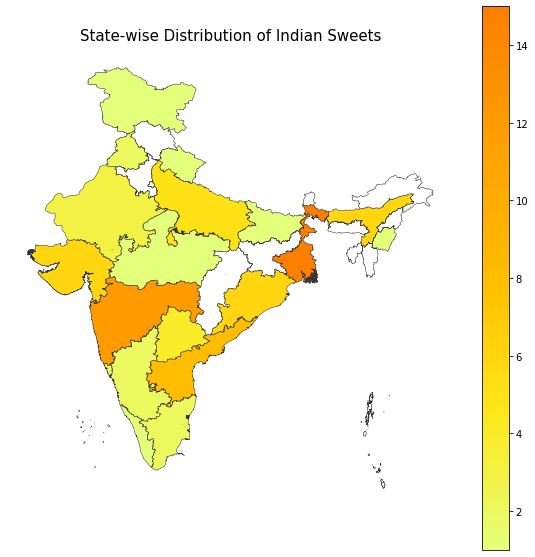

In [146]:
shp_gdf = gpd.read_file('Indian States/Indian_states.shp')
desserts = df[df['course']=='dessert']
des_df = desserts.state.value_counts().reset_index()
des_df.columns=['state','count']
des_df.head()
merged = shp_gdf.set_index('st_nm').join(des_df.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Sweets',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='count', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
Most number of famous sweets are seen in <b>West Bengal</b>.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
   There are more than <b>hundred</b> varieties of indian sweets made in different sates in India .
    

### IV. Number of dishes based on courses of meal

In [147]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df.head()
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#FA962F'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
About <b>129</b> dishes are preferrably eaten as <b>main course</b>.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
   The very famous sweet gulab jamun without it we cannot imagine any celebration is actually a <b>Mediterranean dish</b> that was 
   accidentally invented by Shah Jahan's Chef.Gulab Jamun is a Persian name,this dessert was first prepared in the
   Mediterranean region.
    

### V. Proportion of Flavour Profiles

In [148]:
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor','count']
fig=px.pie(pie_df, values='count', names='flavor', title='Proportion of Flavor Profiles',
             color_discrete_sequence=['#FF7F0E', '#00B5F7','#AB63FA','#00CC96'])
fig.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
More tahn 50% indian dishes are <b>spicy</b> in flavour.


<div class="alert-alert-block alert-warning">

**Facts:-** 
</div>
 <b>Worls's Spic Bowl</b>India is the world's largest producer of spices.India produces <b>~75</b> of the 109 varieties of spices listed by ISO.
    

### VI. Ingredients used in Indian deserts

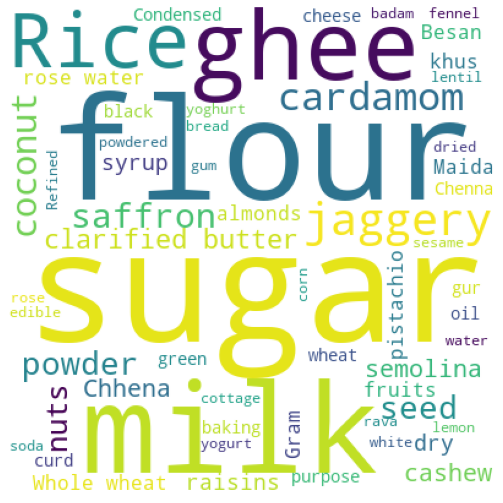

In [149]:
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)  
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>
Most commonly used ingredients in indian desserts are <b>flour,sugar,milk,ghee,rice</b> in flavour.


### VII. Ingredients used in South Indian cuisines

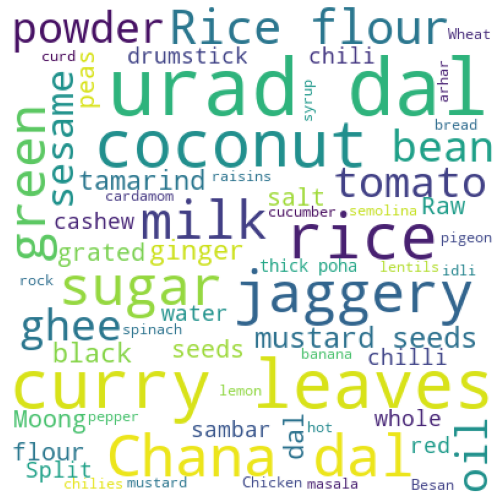

In [150]:
south_df = df[df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### VIII. Ingredients used in North Indian cuisines

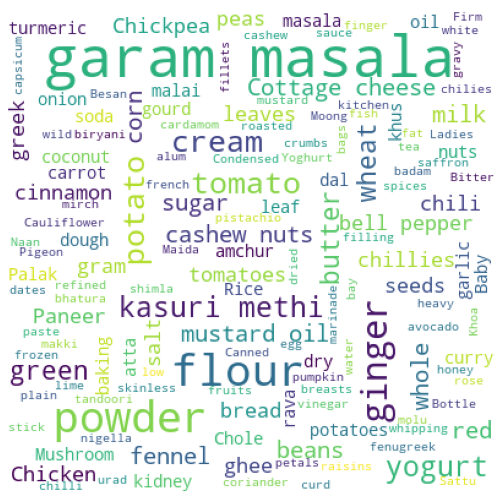

In [183]:
north_df = df[df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

<div class="alert-alert-block alert-warning">

**Observation:-**
</div>]]]
Most commonly used ingredients in South-Indian cuisines are <b>urad dal,coconut,curry leaves,chana dal,rice</b>.


### IX. List of Indian dishes that are sweet in flavour but not desserts

In [185]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']
#final_sweet_df

 - Obbattu holige
 - Dal makhani
 - Mishti Chholar Dal	

### X. Overall ingredients used in Indian cuisines

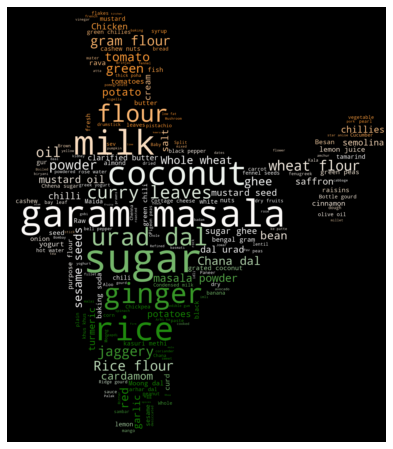

In [186]:
ingredients = []
for i in range(0,len(df)):
    text = df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('ind.jpg'))

wc = WordCloud(background_color="black", width = 400, height = 400,mask=india_coloring,min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (8, 8))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

### XI. Comparing preparation time and cooking time for Veg and Non Veg dishes 

In [177]:
fig = px.scatter(df,x='cook_time ',y='prep_time',color='diet',
                 color_discrete_sequence=['green','red'], hover_data = ['name'],
                 labels={
                     'cook_time ': 'Cooking time (minutes)',
                     'prep_time': 'Preparation time (minutes)'
                 })
fig.show()

### XII. Maharashtra Food-Mini Infograph

In [178]:
mah_df = df[df['state']=='Maharashtra']
total_dishes = mah_df.shape[0]

course_df = mah_df['course'].value_counts().reset_index()
course_df.columns = ['course','num']

diet_df = mah_df['diet'].value_counts().reset_index()
diet_df.columns = ['diet','num']

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Dishes','Dishes by Courses','', ''),
    specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2} ],
          [ {'type': 'pie'} , {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes),
    number={'font':{'color': 'blue','size':50}},
),row=1, col=1)


fig.add_trace(go.Bar(
    x=course_df['course'],y=course_df['num'],
    marker={'color': 'orange'},  
    text=course_df['num'],
    name='dishes by courses',
    textposition ='auto'),row=1, col=2)

fig.add_trace(go.Pie(labels=diet_df['diet'], 
                     values=diet_df['num'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=2, col=1)


fig.update_layout(
    title_text='Maharashtra Food-Mini Infograph',template='plotly',
    title_x=0.5)

fig.show()

### XIII.Ingredients used in Vegetarian Food

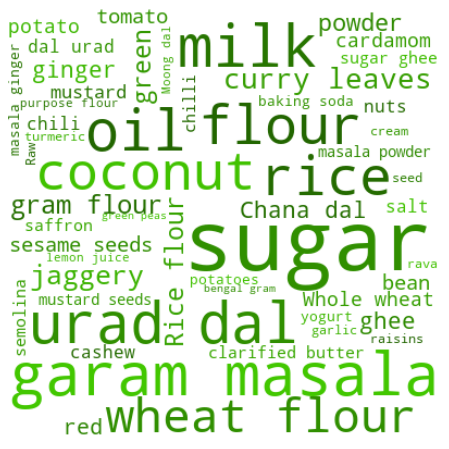

In [179]:
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)


veg_df = df[df['diet']=='vegetarian'].reset_index()

ingredients = []
for i in range(0,len(veg_df)):
    text = veg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

### XIV.Ingredients used in Non-Vegetarian Food

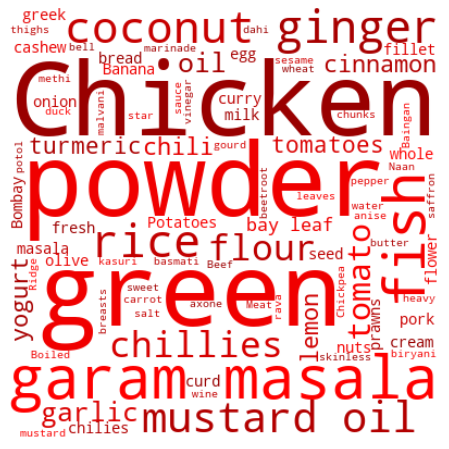

In [180]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)


nveg_df = df[df['diet']=='non vegetarian'].reset_index()

ingredients = []
for i in range(0,len(nveg_df)):
    text = nveg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

### XV. Top 10 snacks with shortest cooking time

In [181]:
snack_df = df[df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time '],ascending=True).iloc[:10,:]

fig = px.bar(short_sort_snack_df,y='name',x='cook_time ',
             orientation='h',color='cook_time ',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

### XVI. Top 10 snacks with longest cooking time

In [182]:
snack_df = df[df['course']=='snack']

long_sort_snack_df = snack_df.sort_values(['cook_time '],ascending=False).iloc[3:13,:]

fig = px.bar(long_sort_snack_df,y='name',x='cook_time ',
             orientation='h',color='cook_time ',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()